### Dimensionality reduction with principal component analysis

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load UCI wine data set
# This is originally a classification benchmark dataset
# https://archive.ics.uci.edu/ml/datasets/wine
data=np.genfromtxt('./data/wine.data',delimiter=',')
X=data[:,1:]
n,p=X.shape
print(n,p)
ylab=data[:,0] # Wine type (one of three, not used for dimensionality reduction, only to check results below)

178 13


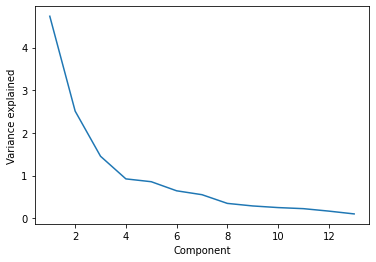

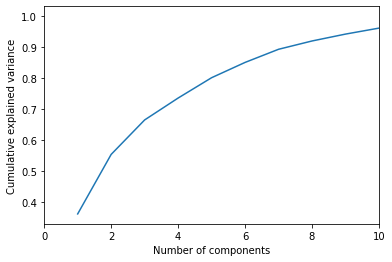

In [4]:
from sklearn.decomposition import PCA

# Scale data to have zero mean and unit variance
# In all cases, the mean has to be removed from the data
# Whether the data should be scaled to have unit variance depends on the application
# I suggest performing this scaling unless you have a good reason not to, e.g. when
# working with image data another type of scaling (whitening transform) should be used
X = StandardScaler().fit_transform(X)
pca = PCA().fit(X)

# The largest eigenvalue is equal to the variance in the data after projecting onto the corresponding
# eigenvector ("first" principal component), the second eigenvalue is equal to the variance in the
# data after projecting onto the corresponding eigenvector ("second principal component") and so on 
plt.plot(np.arange(1,p+1), pca.explained_variance_) # These are the eigenvalues, sorted in descending order
plt.xlabel('Component')
plt.ylabel('Variance explained')
plt.show()

plt.figure()
plt.plot(np.arange(1,p+1), np.cumsum(pca.explained_variance_ratio_)) # This is sum_{i=1}^k (lambda_i) / sum(lambda)
plt.xlim(0,10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The upper plot shows that the variance starts to level off once we include four components.
We sometimes observe a "knee" in such figures which can give an indication of an appropriate
size of the subspace.
 
From the lower plot we see that the two largest principal components explain ~55% of the variance in the data. This means that a 2D projection of the data, e.g. for visualization, will retain 55% of the total variance.

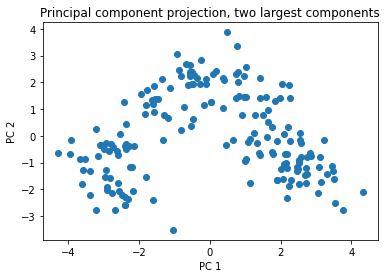

In [5]:
# Project original data to two-dimensions using the two largest principal components
# and visualize with a scatter plot. Sometimes components 1 vs 3 or 2 vs 3 can give
# interesting projections
pca = PCA(n_components=2)
pca.fit(X)
Xred = pca.transform(X)
plt.scatter(Xred[:,0],Xred[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Principal component projection, two largest components')
plt.show()

While there are no clearly separated clusters, three areas in the above figure
have a somewhat high density of points, suggesting three clusters. We can check this using the class labels to color individual points (this is not possible in a truly unsupervised setting where labels are unknown).

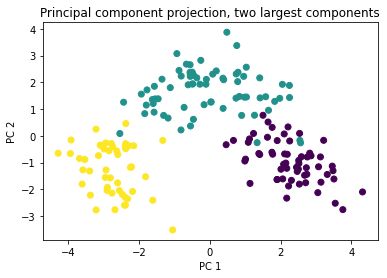

In [6]:
plt.scatter(Xred[:,0],Xred[:,1],c=ylab)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Principal component projection, two largest components')
plt.show()

### Visualization with t-SNE

In [9]:
# t-Stoachastic neighbor embedding (t-SNE)

# The version used here was downloaded from https://lvdmaaten.github.io/tsne/
# See this page for more examples and troubleshooting info
#
# In this implementation the data is first projected to a 30-dimensional subspace
# using PCA. This speeds up the optimization of the cost function used to find the
# 2D (or 3D) projection and also reduces noise in the original data which can improve
# the quality of the visualization
#
# Run several times and pick result with lowest error. Note that you can only
# compare error rates between runs when the perplexity is fixed.

from tsne import tsne
#  Perplexity values ("effective number of neighbors") typically between 5 and 50
yfit=tsne(X, no_dims=2, perplexity=50.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 178...
Mean value of sigma: 2.086646
Iteration 10: error is 10.876945
Iteration 20: error is 9.615835
Iteration 30: error is 10.216746
Iteration 40: error is 10.189946
Iteration 50: error is 10.438163
Iteration 60: error is 10.477583
Iteration 70: error is 10.439497
Iteration 80: error is 10.269473
Iteration 90: error is 10.312317
Iteration 100: error is 10.380184
Iteration 110: error is 1.285307
Iteration 120: error is 0.953416
Iteration 130: error is 0.731005
Iteration 140: error is 0.564712
Iteration 150: error is 0.450793
Iteration 160: error is 0.338040
Iteration 170: error is 0.298321
Iteration 180: error is 0.288976
Iteration 190: error is 0.281073
Iteration 200: error is 0.273139
Iteration 210: error is 0.266834
Iteration 220: error is 0.265341
Iteration 230: error is 0.261438
Iteration 240: error is 0.258464
Iteration 250: error is 0.257866
Iteration 260: error is 0.257753
Ite

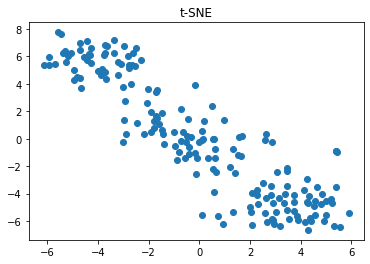

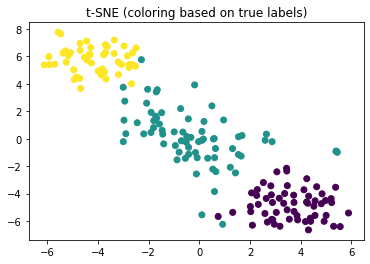

In [10]:
# Visualize the results
plt.scatter(yfit[:,0],yfit[:,1])
plt.title('t-SNE')
plt.show()

plt.scatter(yfit[:,0],yfit[:,1],c=ylab)
plt.title('t-SNE (coloring based on true labels)')
plt.show()

In [14]:
# Principal component analysis and t-SNE used to examine
# the MNIST dataset of handwritten digits

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset (small subset)
X = np.loadtxt("data/mnist2500_X.txt")
labels = np.loadtxt("data/mnist2500_labels.txt")

# Scale data to have zero mean, scaling individual features 
# is not appropriate for image data
Xsc = StandardScaler(with_std=False).fit_transform(X)

def scatter_plot(ypred, labels, xlabel='', ylabel=''):
    # Create a scatter plot with class labels as a legend
    #plt.figure(figsize=(7,5))
    cmap=plt.get_cmap("Paired").colors[0:10]
    for cls in range(0,10):
        idx=np.where(labels==cls)
        plt.scatter(ypred[idx,0],ypred[idx,1],s=10,c=np.tile(cmap[cls],(len(idx),1)), label="{}".format(cls))
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

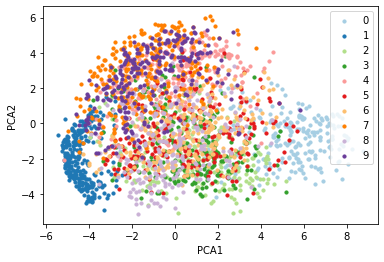

In [15]:
# 2D projection using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Xsc)
ypred = pca.transform(Xsc)

scatter_plot(ypred, labels, xlabel='PCA1',ylabel='PCA2')

Apart from the digits 1 (bottom left) and 0 (bottom right) there is a strong overlap between the different digits.

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 2.573319
Iteration 10: error is 22.084540
Iteration 20: error is 19.555295
Iteration 30: error is 16.757127
Iteration 40: error is 15.868378
Iteration 50: error is 15.687975
Iteration 60: error is 15.635431
Iteration 70: error is 15.588631
Iteration 80: error is 15.559831
Iteration 90: error is 15.537304
Iteration 100: error is 15.519330
Iteration 110: error is 2.165112
Iteration 120: error is 1.885835
Iteration 130: error is 1.698058
Iteration 140: error is 1.569106
Iteration 150: error is 1.476675
Iteration 160: error is 1.406732
Iteration 170: error is 1.351868
Iteration 180: error is 1.307780
Iteration 190: error is 1.271603
Iteration 200: error is 1.241293
Iteration 210: error

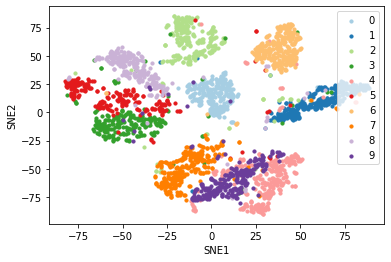

In [16]:
# MNIST 2D projection with t-SNE
from tsne import tsne

# The t-sne implementation is from Laurens van der Maaten
# Note: In order to use the scikit-learn t-sne implementation
# you should perform an initial dimensionality reduction with
# PCA to 30 to 50 dimensions prior to calling TSNE
ypred=tsne(Xsc, no_dims=2, initial_dims=50, perplexity=30.0)
scatter_plot(ypred, labels, xlabel='SNE1',ylabel='SNE2')

# It is recommended to run t-SNE a few times and pick the solution
# with the lowest objective function value ("error")

t-SNE gives a much better separation. There is still some overlap (e.g. digits 3 and 5) but now six classes are more less separated from the rest.